In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re
import netCDF4 as nc

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.viewer_2d import *
from code_comparison.code_comparison import *

from gridtools.solps_python_scripts.read_b2fgmtry import *

from soledge.mk_funcs import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [2]:
import h5py
import os
import numpy							as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot 				as pyp
from matplotlib.backends.backend_pdf	import PdfPages
from files.load_plasma_files			import load_plasma_files
from files.load_soledge_mesh_file		import load_soledge_mesh_file
from files.load_refpar_file				import load_refpar_file
from files.load_ions_list				import load_ions_list
from routines.h5_routines 				import h5_read
from routines.utils_routines			import extend_mat1
from routines.utils_walls				import plot2d_walls

In [3]:
# path = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_cases\copy_wallStd_bra_nocore_D"
path = r"C:\Users\Mike.Kryajak\OneDrive\Project\collab\tech\compare_data\soledge_cases\copy_wallMike_bra_nocore_D"

# Extract geom and make triangulation
if_tri	 = h5py.File(os.path.join(path,"triangles.h5"), "r")
TriKnots = h5_read(if_tri,"triangles/tri_knots")
TriKnots = TriKnots - 1 										#Matlab/Fortan to python indexes
R		 = h5_read(if_tri,"knots/R")*0.01
Z		 = h5_read(if_tri,"knots/Z")*0.01

In [6]:
%matplotlib widget

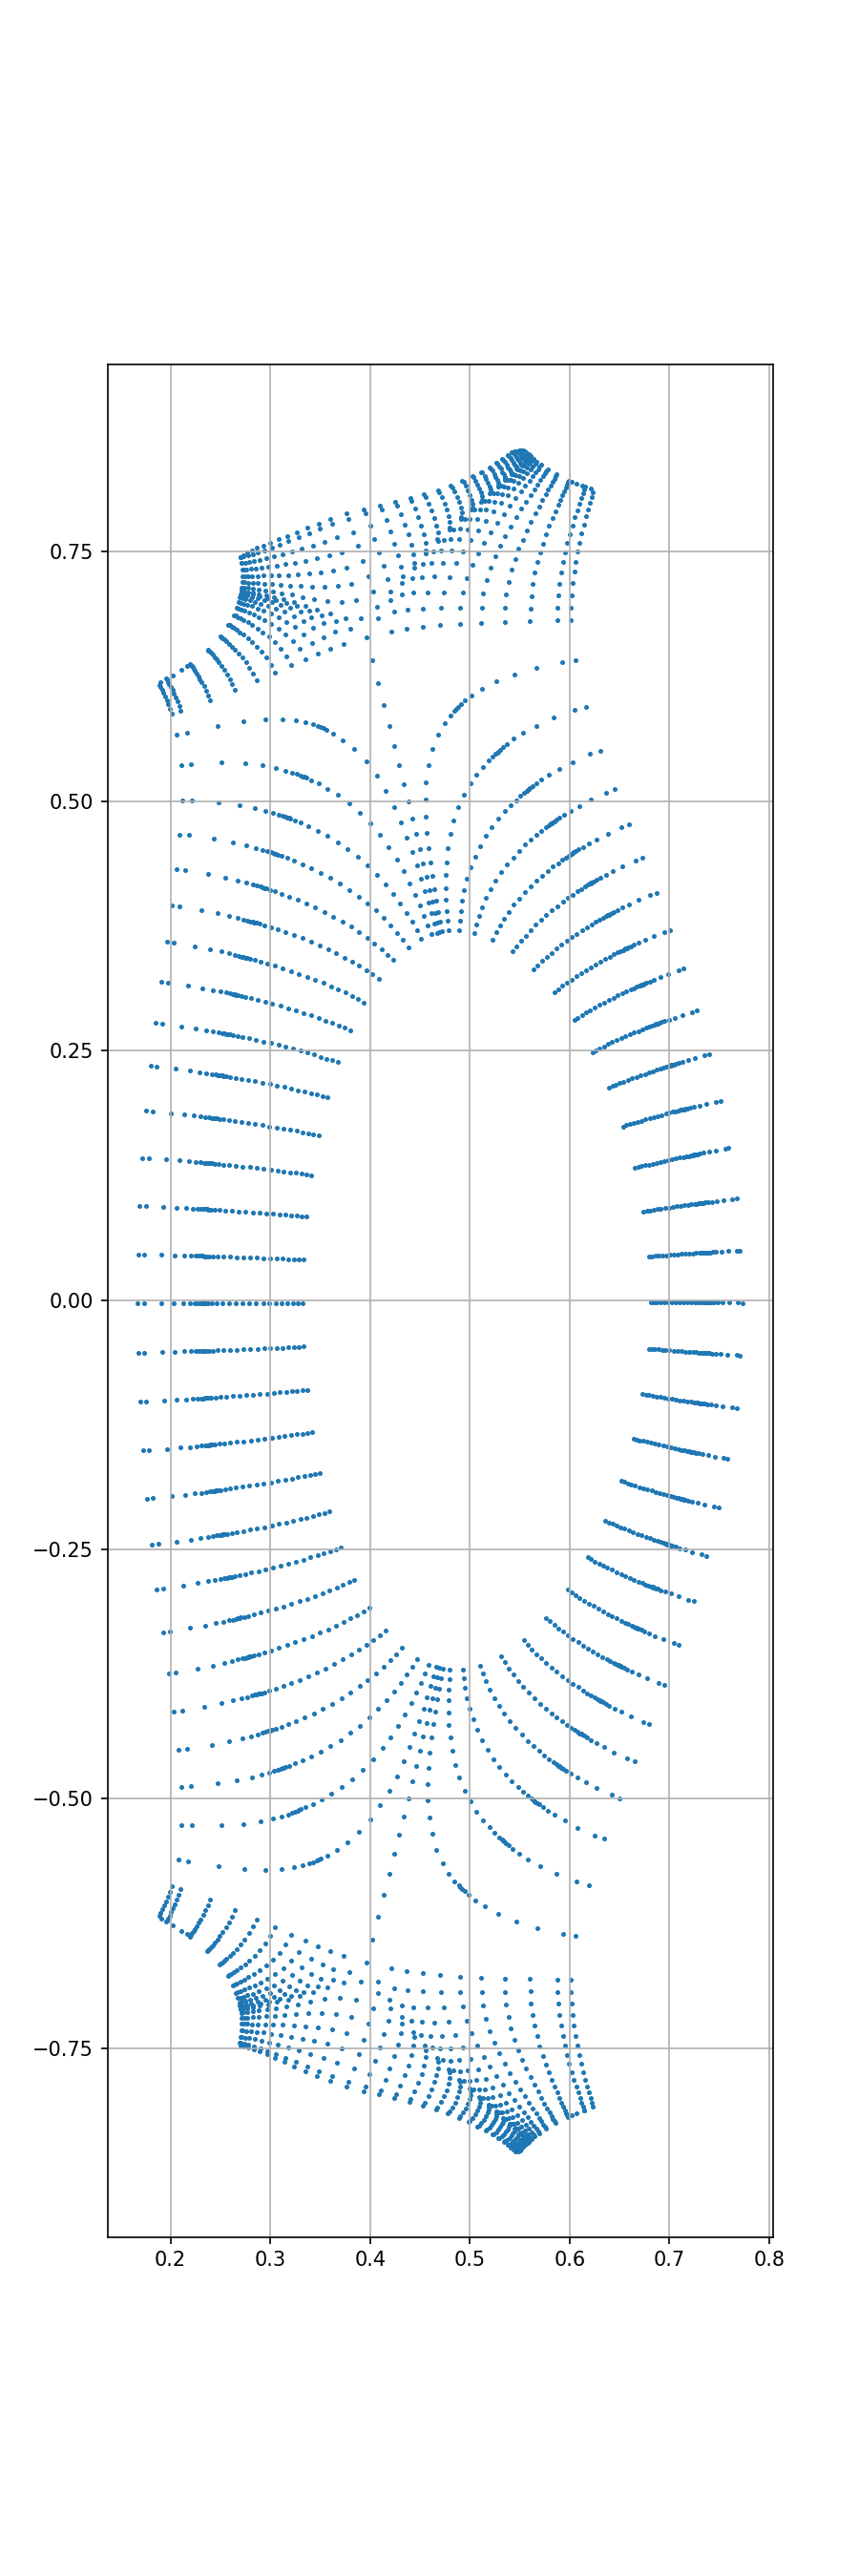

In [8]:
fig, ax = plt.subplots(figsize = (6,18), dpi = 150)

ax.set_aspect("equal")
ax.scatter(R,Z, s = 2)
ax.grid()

In [21]:
Config = load_soledge_mesh_file(os.path.join(path, "mesh.h5"))			#	load mesh
Zones	= Config.Zones

load_soledge_mesh_file: reading file  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_cases\copy_wallStd_bra_nocore_D\mesh.h5
	load_soledge_mesh_file: in_equ = OK
	h5_read: error reading:  /mesher/Fields/RadArroundXp
	load_soledge_mesh_file: extrapol = OK
	load_soledge_mesh_file: xPoints = OK
	load_soledge_mesh_file: Frontiers = OK
	load_soledge_mesh_file: Limits = OK
	h5_read: error reading:  /mesher/OMP_segment/mesher/refpoints/nPoints
	load_soledge_mesh_file: Segments = OK
	load_soledge_mesh_file: MagGrid_OK = OK
	load_soledge_mesh_file: new_equ = OK
	load_soledge_mesh_file: equ = OK
	load_soledge_mesh_file: Mesh = OK
	load_soledge_mesh_file: transp_prof = OK
	load_soledge_mesh_file: transp_values = OK
	load_soledge_mesh_file: feedback_tranps = OK
	h5_read: error reading:  /mesher/FeedbackPuffing/AutoTarget
	load_soledge_mesh_file: feedback_puffing = NO
	h5_read: error reading:  /CustomPlots/Parallel/nPlots
	h5_read: error reading:  /CustomPlots/Perpendicular/nPlots

In [24]:
for i, _ in enumerate(Zones):
    Zones[i] = Zones[i].__dict__

In [32]:
%matplotlib inline
plt.close("all")

In [42]:
from eirene.get_wall_triangles					import get_wall_triangles

from files.load_eirene_triangles					import load_eirene_triangles

Eirene = load_eirene_triangles(os.path.join(path, "triangles.h5"))
Config = load_soledge_mesh_file(os.path.join(path, "mesh.h5"))			#	load mesh


Plasmas = load_plasma_files(path, nZones=len(Config.Zones), iPlasmas = [0], Evolution=0)
RWalls, ZWalls, iKnots = get_wall_triangles(Eirene,  nTri=Plasmas[0][0].Wall.ntri, Side=Plasmas[0][0].Wall.side)

load_eirene_triangles: reading file  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_cases\copy_wallStd_bra_nocore_D\triangles.h5
wall_segments
wall_segments: completed
	h5_read: error reading:  /walls_eirene_external/nExtWalls
	h5_read: error reading:  surfaces/nSurfaces
load_eirene_triangles: Completed
load_soledge_mesh_file: reading file  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_cases\copy_wallStd_bra_nocore_D\mesh.h5
	load_soledge_mesh_file: in_equ = OK
	h5_read: error reading:  /mesher/Fields/RadArroundXp
	load_soledge_mesh_file: extrapol = OK
	load_soledge_mesh_file: xPoints = OK
	load_soledge_mesh_file: Frontiers = OK
	load_soledge_mesh_file: Limits = OK
	h5_read: error reading:  /mesher/OMP_segment/mesher/refpoints/nPoints
	load_soledge_mesh_file: Segments = OK
	load_soledge_mesh_file: MagGrid_OK = OK
	load_soledge_mesh_file: new_equ = OK
	load_soledge_mesh_file: equ = OK
	load_soledge_mesh_file: Mesh = OK
	load_soledge_mesh_file: transp

In [50]:
pd.DataFrame.to_csv?

Signature:
pd.DataFrame.to_csv(
    self,
    path_or_buf: 'FilePath | WriteBuffer[bytes] | WriteBuffer[str] | None' = None,
    sep: 'str' = ',',
    na_rep: 'str' = '',
    float_format: 'str | Callable | None' = None,
    columns: 'Sequence[Hashable] | None' = None,
    header: 'bool_t | list[str]' = True,
    index: 'bool_t' = True,
    index_label: 'IndexLabel | None' = None,
    mode: 'str' = 'w',
    encoding: 'str | None' = None,
    compression: 'CompressionOptions' = 'infer',
    quoting: 'int | None' = None,
    quotechar: 'str' = '"',
    lineterminator: 'str | None' = None,
    chunksize: 'int | None' = None,
    date_format: 'str | None' = None,
    doublequote: 'bool_t' = True,
    escapechar: 'str | None' = None,
    decimal: 'str' = '.',
    errors: 'str' = 'strict',
    storage_options: 'StorageOptions' = None,
) -> 'str | None'
Docstring:
Write object to a comma-separated values (csv) file.

Parameters
----------
path_or_buf : str, path object, file-like object, or N

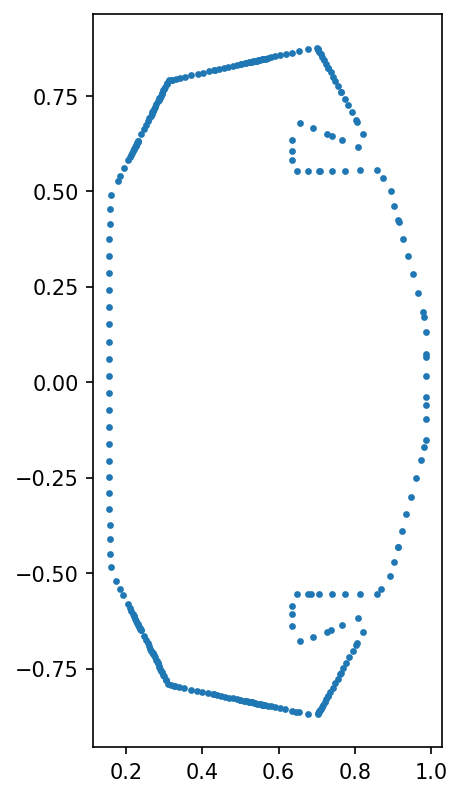

In [54]:
fig, ax = plt.subplots(figsize= (3,8), dpi = 150)
ax.scatter(RWalls, ZWalls, s = 5)
ax.set_aspect("equal")

df = pd.DataFrame()
df["R"] = RWalls
df["Z"] = ZWalls

df.to_csv(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\4-soledge_optimised\wall_RZ.csv", index = False, sep = " ", header = False)

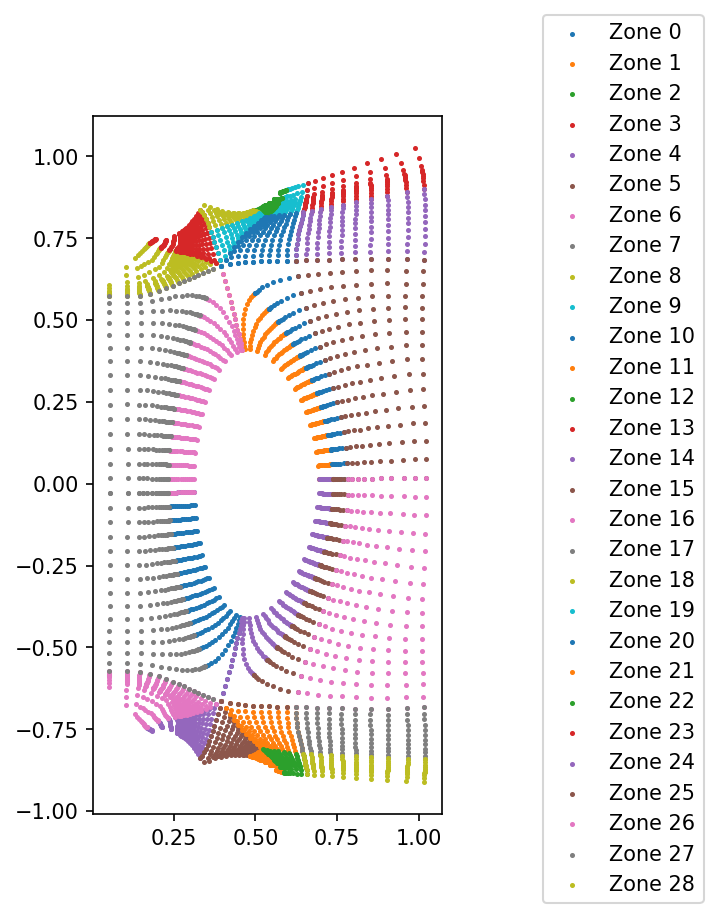

In [38]:
fig, ax = plt.subplots(figsize= (3,8), dpi = 150)

for i, _ in enumerate(Zones):
    ax.scatter(Zones[i]["gridR"], Zones[i]["gridZ"], label = f"Zone {i}", s = 2)
ax.set_aspect("equal")
fig.legend(loc="center left", bbox_to_anchor = (1.1, 0.5))

## Find core zones

In [82]:
Zones[i]["gridR"].shape

(16, 16)

(-1.0, 1.0)

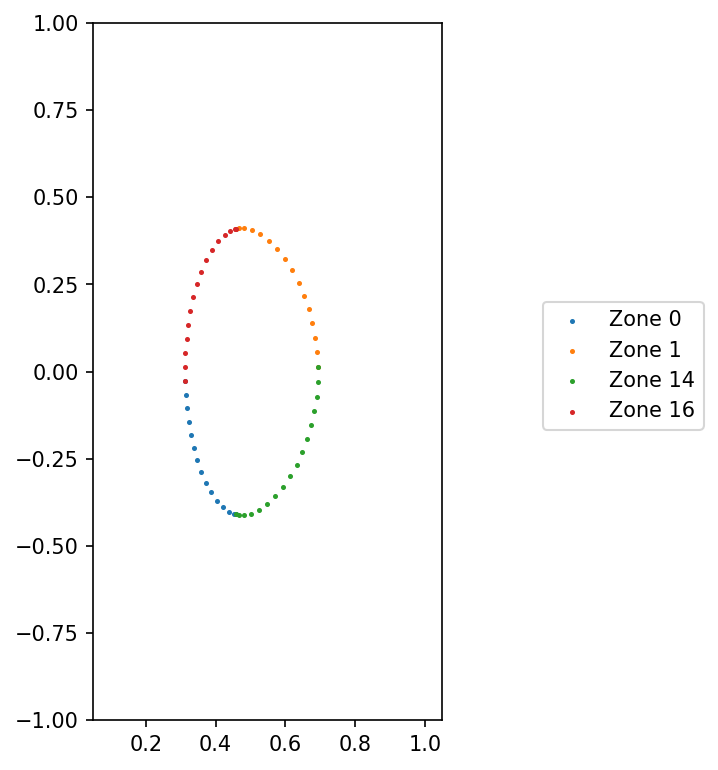

In [83]:
fig, ax = plt.subplots(figsize= (3,8), dpi = 150)

for i in [0,1,14,16]:
    ax.scatter(Zones[i]["gridR"][0,:], Zones[i]["gridZ"][0,:], label = f"Zone {i}", s = 2)
ax.set_aspect("equal")
fig.legend(loc="center left", bbox_to_anchor = (1.1, 0.5))
ax.set_xlim(0.05, 1.05)
ax.set_ylim(-1,1)

In [104]:
%matplotlib widget

In [107]:
Zones[0]["gridRc"].shape

(15, 14)

C:\Users\mikek\AppData\Local\Temp\ipykernel_16612\2014561721.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(Zones[k]["gridR"], Zones[k]["gridZ"], np.ones_like(Zones[k]["gridR"]), shading="nearest",


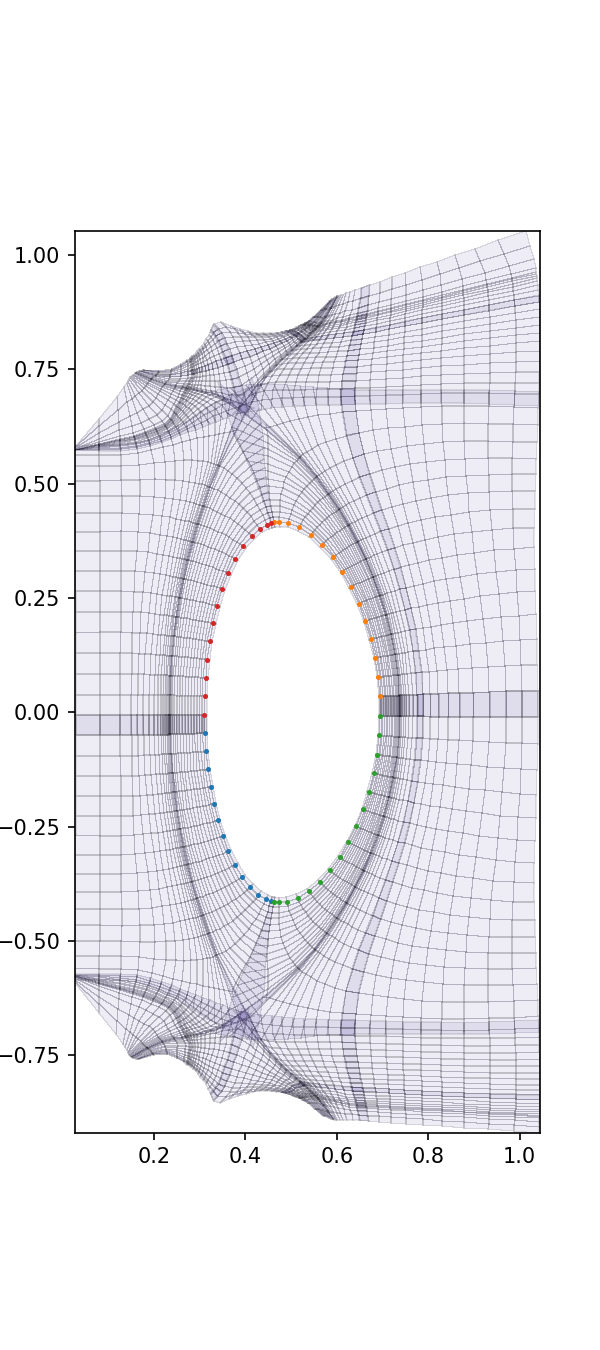

In [108]:
fig, ax = plt.subplots(figsize=(4,9), dpi = 150)

# Plot hex grid
for k in range(len(Zones)):
    im = ax.pcolormesh(Zones[k]["gridR"], Zones[k]["gridZ"], np.ones_like(Zones[k]["gridR"]), shading="nearest",  
                       cmap = "Spectral_r", 
                       linewidth = 0.01, color="k", antialiaseds = True, alpha =0.1)
    
# Plot core edge vertices
for i in [0,1,14,16]:
    ax.scatter(Zones[i]["gridRc"][0,:], Zones[i]["gridZc"][0,:], label = f"Zone {i}", s = 2)
    
ax.set_aspect("equal")